In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Import Data

df = pd.read_csv('medical_examination.csv')
print(df.head())

   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            1     1      0   
1   1  20228    1     156    85.0    140     90            3     1      0   
2   2  18857    1     165    64.0    130     70            3     1      0   
3   3  17623    2     169    82.0    150    100            1     1      0   
4   4  17474    1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [21]:
# Create Column for Overweight Variable

def calc_overweight(height_cm, weight_kg):
    """
    Calculates the weight status based on BMI.

    Args:
    height_cm (float) - Height in cm
    weight_kg (float) - Weight in kg

    Returns:
    int: 1 if overweight, otherwise 0
    """
    height_m = height_cm / 100
    bmi = weight_kg / (height_m ** 2)
    # Return 1 if True , 0 if False
    return int(bmi > 25)  


df['overweight'] = df.apply(lambda row: calc_overweight(row['height'],row['weight']), axis=1)

In [22]:
df.head(3)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0


In [23]:
# Normalize Cholesterol and Glucose Columns
# Replace 1's with 0's and values >1 with a 1

df['cholesterol'] = (df['cholesterol'] > 1).astype(int)

df['gluc'] = (df['gluc'] > 1).astype(int)

In [24]:
df.head(3)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0


In [41]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_filtered = df[['cholesterol','gluc','smoke','alco','active','overweight','cardio']]
    df_cat = pd.melt(df_filtered, value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], id_vars='cardio', var_name='variable', value_name='value')

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.groupby(['variable', 'value', 'cardio']).size().reset_index(name='total')

    # Draw the catplot with 'sns.catplot()'
    g = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar')

    # Get the figure for the output
    fig = g.figure

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

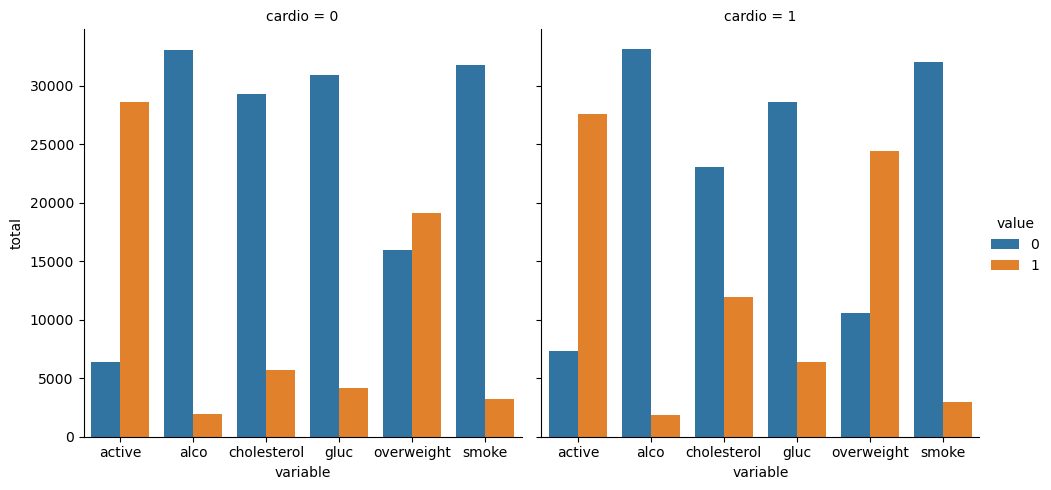

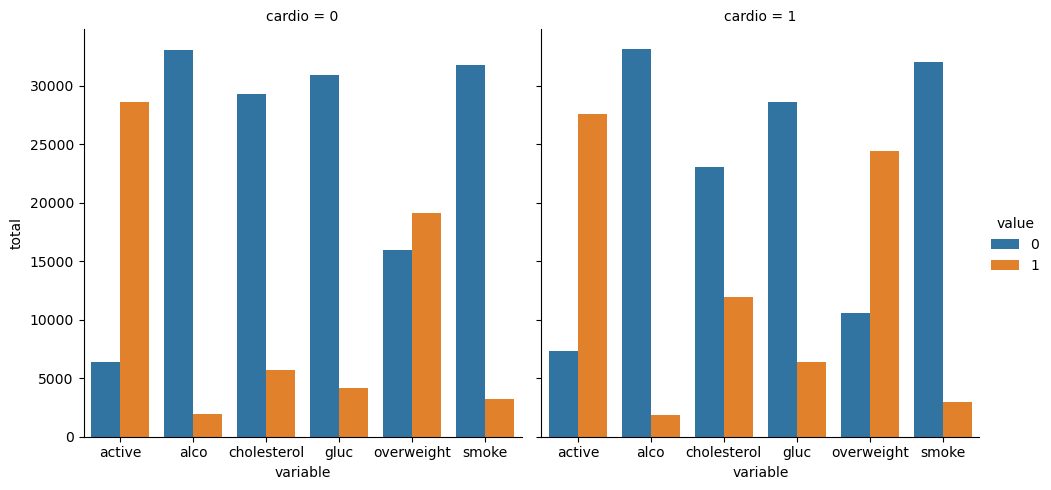

In [42]:
draw_cat_plot()